## Problem Statement

Lending Club, a consumer finance marketplace specializing in offering a variety of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. <i>If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company</i>

2. <i>If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company</i>

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    * <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)

    * <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    * <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
    <br>

2. <b>Loan rejected:</b> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default, therefore objective is to point out applicants who have risk of defaulting on loans, enabling them to reduce business loss.


## Let's Start With Our Analysis 


### Loading Libraries and Data
1. For data loading, we are using <b>pandas</b> and <b>numpy</b>
2. For data visualization & plotting, we are using <b>seaborn</b> and <b>matplotlib</b>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
#reading file with name "loan.csv"
loan_ds=pd.read_csv('loan.csv')

C:\Users\bitzc\AppData\Local\Temp\ipykernel_10044\4218602755.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_ds=pd.read_csv('loan.csv')


<br>


### Dataset Glance
Print the sample data to get the first glance.

In [3]:
loan_ds.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<br>

### Data Cleaning
There are multiple columns with null values, single values and/or null with single values. We need to clean such columns which do not contribute to our data analysis and/or represents irrelevent data.

In [4]:
loan_ds.shape

(39717, 111)

<i>here we can clearly observe, toltal row count is <b>39717</b> and total column count is <b>111</b><br>
    <br><br>
Now let's print the count of null rows to check how many columns are null and need to remove those columns.</i>

In [5]:
loan_ds.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


<i>Here we can observe that we have multiple columns with null values (null for all rows)<br>
tot_hi_cred_lim&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;               <b>39717</b><br>
total_bal_ex_mort&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;             <b>39717</b><br>
total_bc_limit&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;                <b>39717</b><br>
total_il_high_credit_limit&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    <b>39717</b><br></i>

<i>We can remove these null columns as we can't make any conclusion out of it.</i>

In [6]:
#dropping null columns
loan_ds.dropna(axis = 1, how = 'all', inplace = True)
loan_ds.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


<i>slight more observation shows, we have some more columns which have single values(for all rows).ex <b>acc_now_delinq</i><br>


#### Drop Uniform Value Feature:
Printing and removing the columns which have constant values, as they do not cotribute in our analysis.

In [7]:
#removing columns which have only one value.
for col in loan_ds.columns:
    if len(loan_ds[col].unique())==1:
        print(col)
        loan_ds.drop(col,axis=1,inplace=True)
        
loan_ds.head()

pymnt_plan
initial_list_status
policy_code
application_type
acc_now_delinq
delinq_amnt


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0.0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,0.0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0.0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0.0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0.0,0.0,0.0


<br>

<i>external observation(through excel) shows, we dont need below columns for our analysis as these columns do contain either 0 & blank or irrelevent data (ex. URL's, id, member id, zip code etc.)</i>

    *collections_12_mths_ex_med
    *chargeoff_within_12_mths
    *tax_liens
    *url
    *id
    *member_id
    *title
    *zip_code
    *last_credit_pull_d
    *addr_state'

In [8]:
#droping irrelevent columns
loan_ds.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens','url','id', 'member_id','title','zip_code','last_credit_pull_d', 'addr_state'],axis=1,inplace=True)

In [9]:
loan_ds.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,0.0


In [10]:
loan_ds.shape

(39717, 41)

<br>

#### Drop rows
The goal of the analysis is to see who is likely to default loan, therefore we can remove the candidates who have on going loan<b> (loan_status ='Current')</b>

In [11]:
loan_ds = loan_ds[loan_ds['loan_status'] != 'Current']

In [12]:
loan_ds.shape

(38577, 41)

<br>

#### Trimming Rows with High Missing Values
As we have huge dataset, therefore we can remove the rows which have high missing values <b>(> 60%)</b>

In [13]:
loan_ds = loan_ds.loc[:,loan_ds.isnull().sum()/loan_ds.shape[0]*100<60]

<br>

#### Data conversion
Some datapoints have object type data, which can not be used in python for analysis, therefore we need to convert the column type from object/string to respective relevent type.

In [14]:
print('current dtype > '+str(loan_ds['int_rate'].dtype))
loan_ds['int_rate'] = loan_ds['int_rate'].apply(lambda x : float(x[:-1]))
print('current dtype > '+str(loan_ds['int_rate'].dtype))

current dtype > object
current dtype > float64


<i>here we can see, int_rate was in object <b>(giving percent values as 13%)</b> type which may cause issue while analysing and plotting graphs, therefore it become important to change the type to float as we are going to use it. </i>

<br>

### Outlier Treatment
detecting outlier for anual income, as anual income has high varience and high income tends to payoff loan on time. therefore outlier for high income need to be treated.

#### DTI boxplot:


<Axes: >

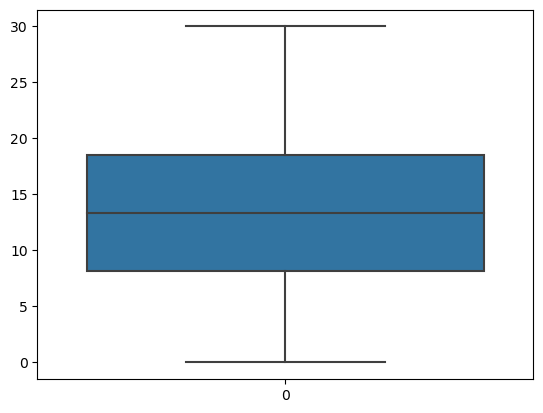

In [15]:
sns.boxplot(loan_ds['dti'])

<br>

#### Anual Income boxplot:

<Axes: >

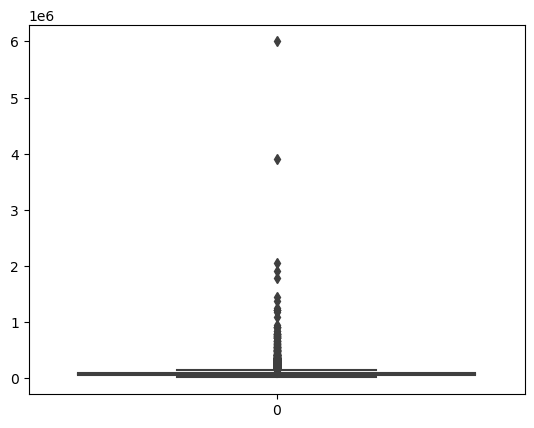

In [16]:
sns.boxplot(loan_ds['annual_inc'])

<i>clearly we can observe that, there is huge amount of outlier exist.</i>

In [17]:
qt_info = loan_ds['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
qt_info

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

<i>With general analysis, the values after 90 percentile seems to be disconected from the general distribution.</i>

<Axes: >

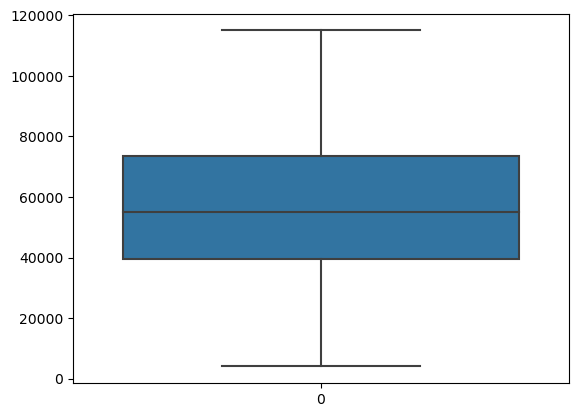

In [18]:
loan_ds = loan_ds[loan_ds['annual_inc'] <= loan_ds['annual_inc'].quantile(0.90)]
sns.boxplot(loan_ds['annual_inc'])

<i>Now anual income data looks good, therefore we can proceed further.</i>


<br>

#### Loan Amount boxplot:

<Axes: >

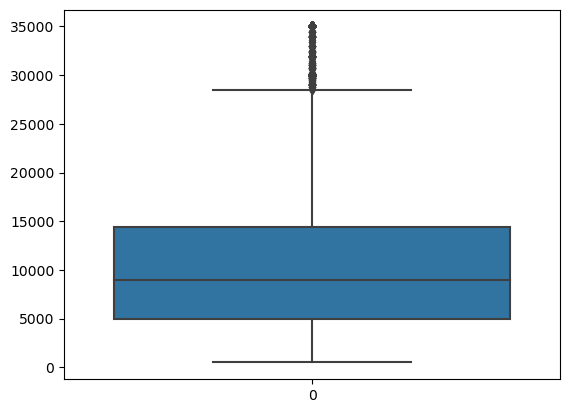

In [19]:
sns.boxplot(loan_ds['loan_amnt'])

<i>loan amount also shows some outlier, however the values are not significantly high therefore we can ignore to remove outlier from the dataset.</i>

<br>

#### Amount funded boxplot:

<Axes: >

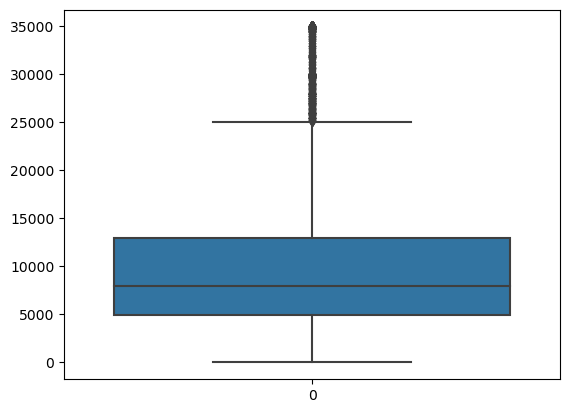

In [20]:
sns.boxplot(loan_ds['funded_amnt_inv'])

<i>As we can see there are some outliers exisit in fund amount invested and loan amount, we can ignore as these are not so significant which needs the treatment.</i>

<br>

### Data Visualizing And Analysis
 
Analysing loan status with respect to the count for loan senctioned.

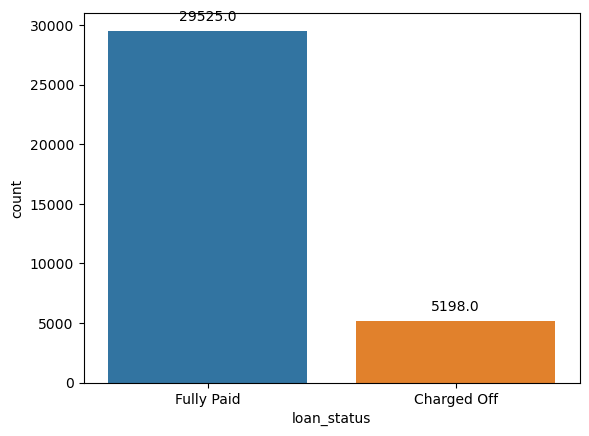

In [21]:
plot=sns.countplot(x = 'loan_status', data = loan_ds)
for p in plot.patches:
    plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

**Note :** <i>Defaulted loans are very low compared to Fully Paid.</i>

<br>

#### Comparision (36 Months - 60 Months - Fully Paid - Charged Off) :
comparing 36 months to 60 month for charged off candidates and month comparision along with fully paid and charged off candidates.

<Axes: xlabel='term', ylabel='count'>

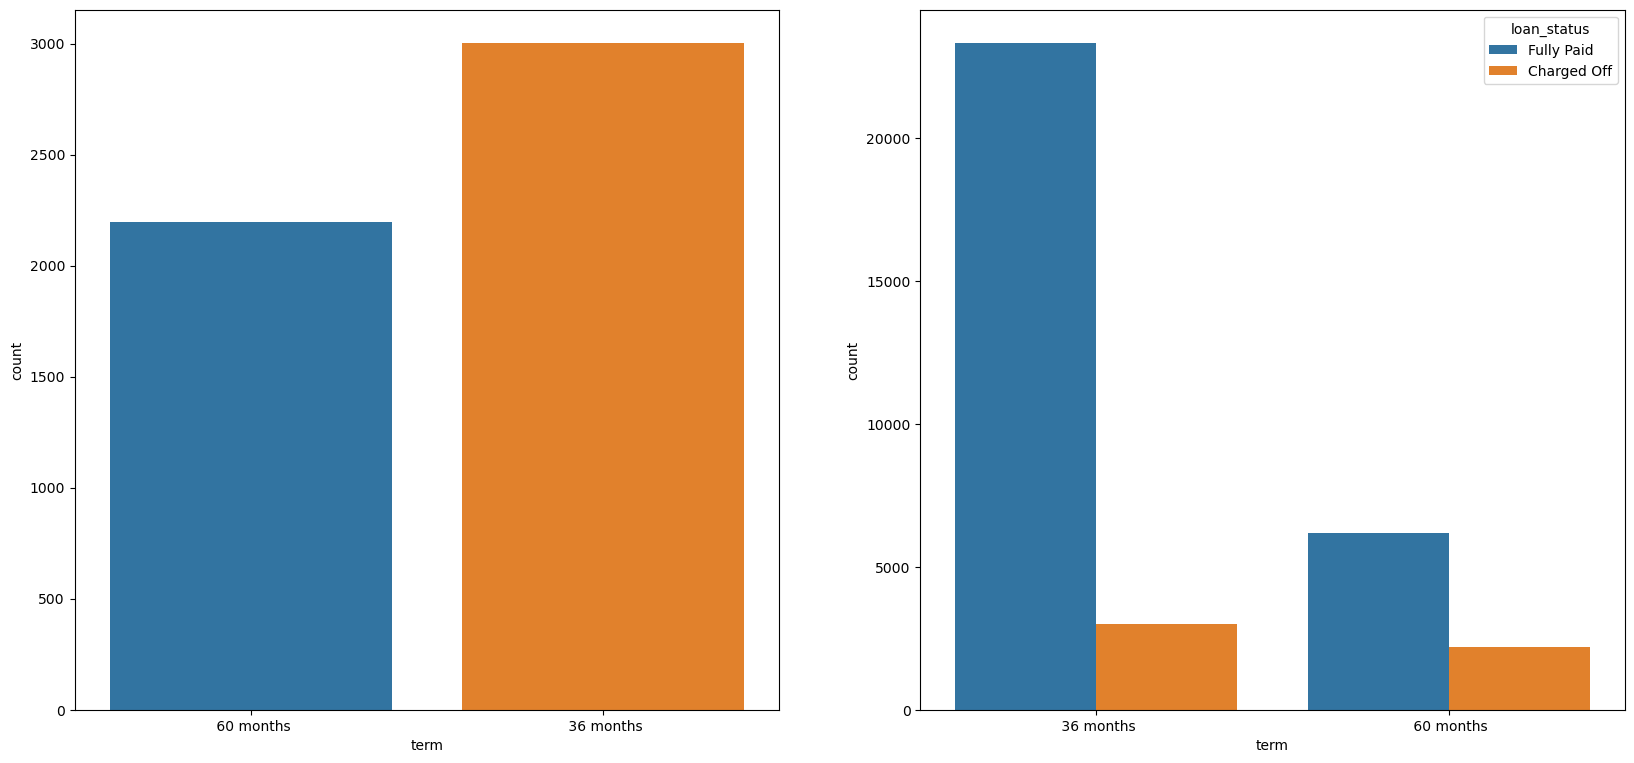

In [22]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x = 'term', data = loan_ds[loan_ds['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x = 'term', data = loan_ds,hue='loan_status')


**Observation :** <i>short term loans (36 mnths) are likely to get defaulted more comapared to 60 months</i>

<br>

#### Impact of Ownership :

<Axes: xlabel='home_ownership', ylabel='count'>

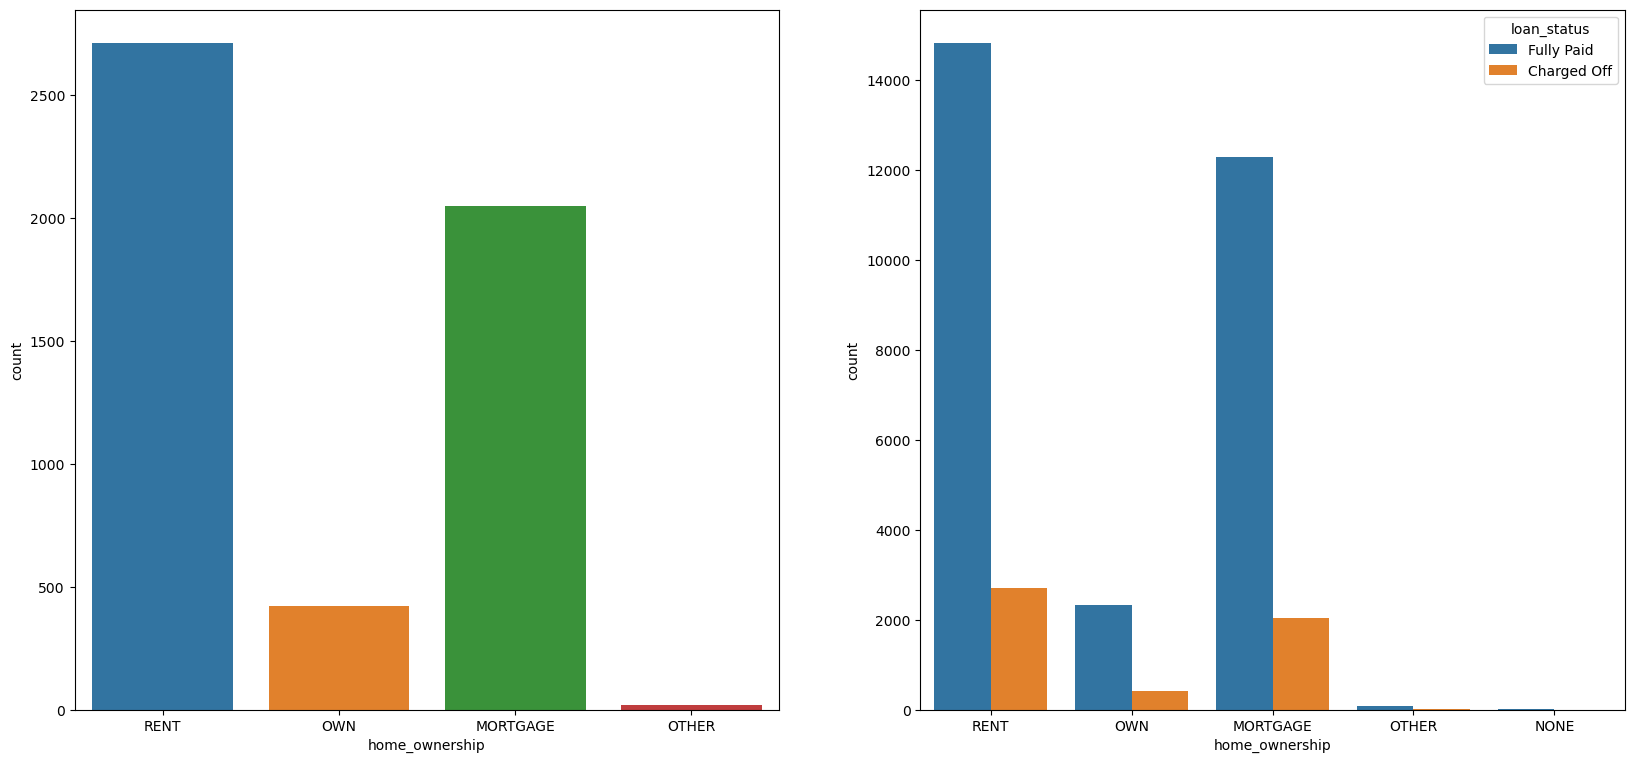

In [23]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x='home_ownership', data=loan_ds[loan_ds['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='home_ownership', data=loan_ds, hue='loan_status')


**Observation :** <i>Rented candidates are more likely to default the loan compared to owned and others</i>

<br>

#### Impact of loan purpose :

<Axes: xlabel='count', ylabel='purpose'>

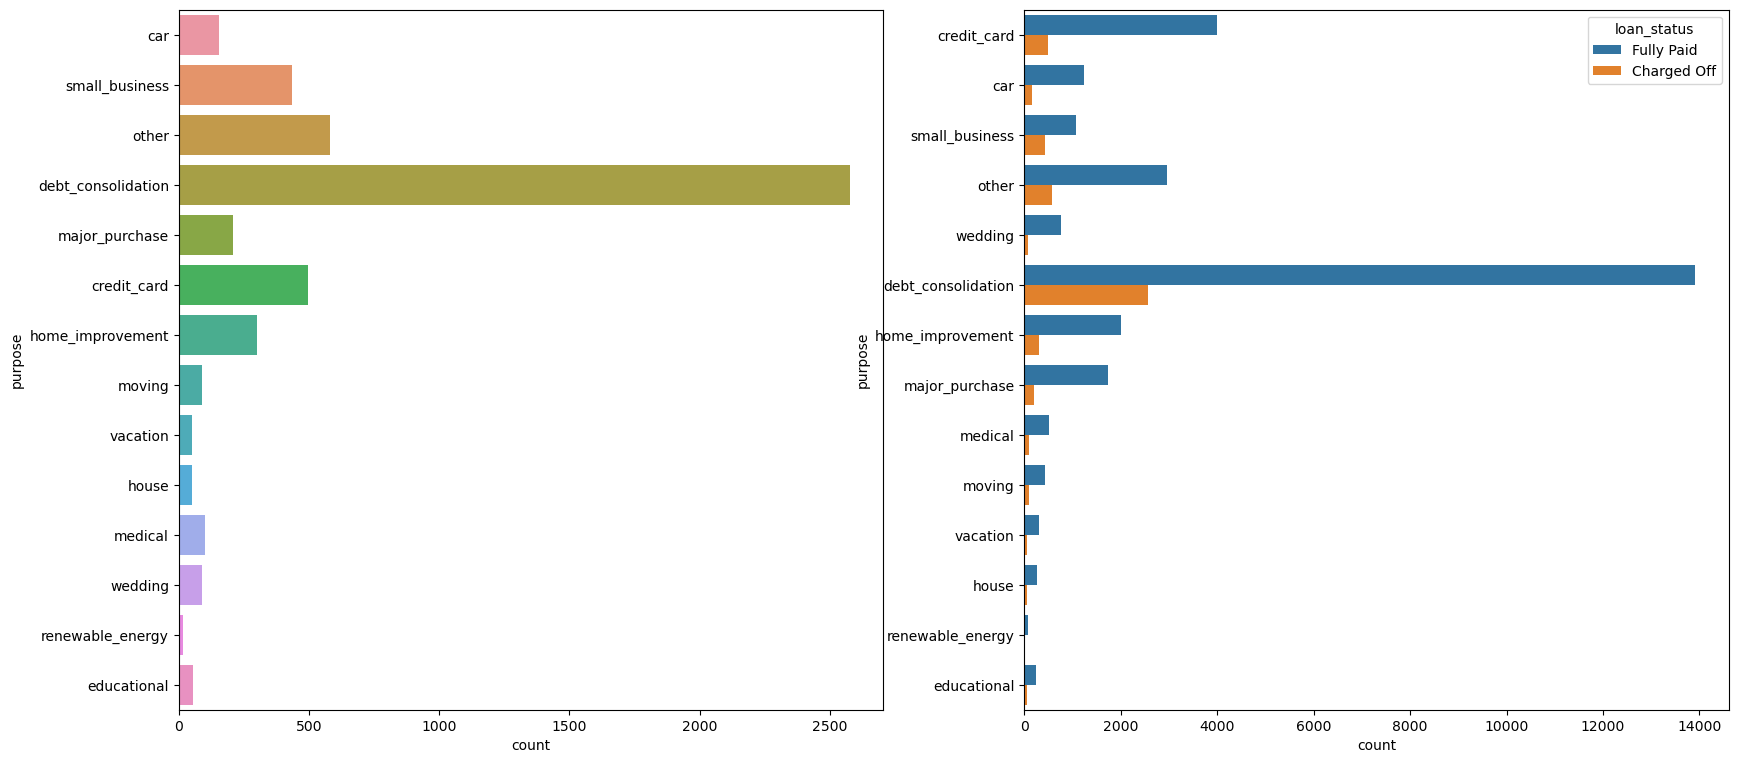

In [24]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(y ='purpose', data=loan_ds[loan_ds['loan_status'] == 'Charged Off'])
plt.subplot(222)
sns.countplot(y ='purpose', data=loan_ds, hue='loan_status')

**Observation** : <i>A large number of loans are taken for clearing other debts.</i>

<br>

#### Impact of Interest rate :
analysis done on categorical derived variable interest rate group (<i>derived from interest rate</i>) with below ranges :
* 5%-10%
* 11%-15%
* 16%-20%
* 21%-25%

Text(0.5, 0, 'Interest Rate')

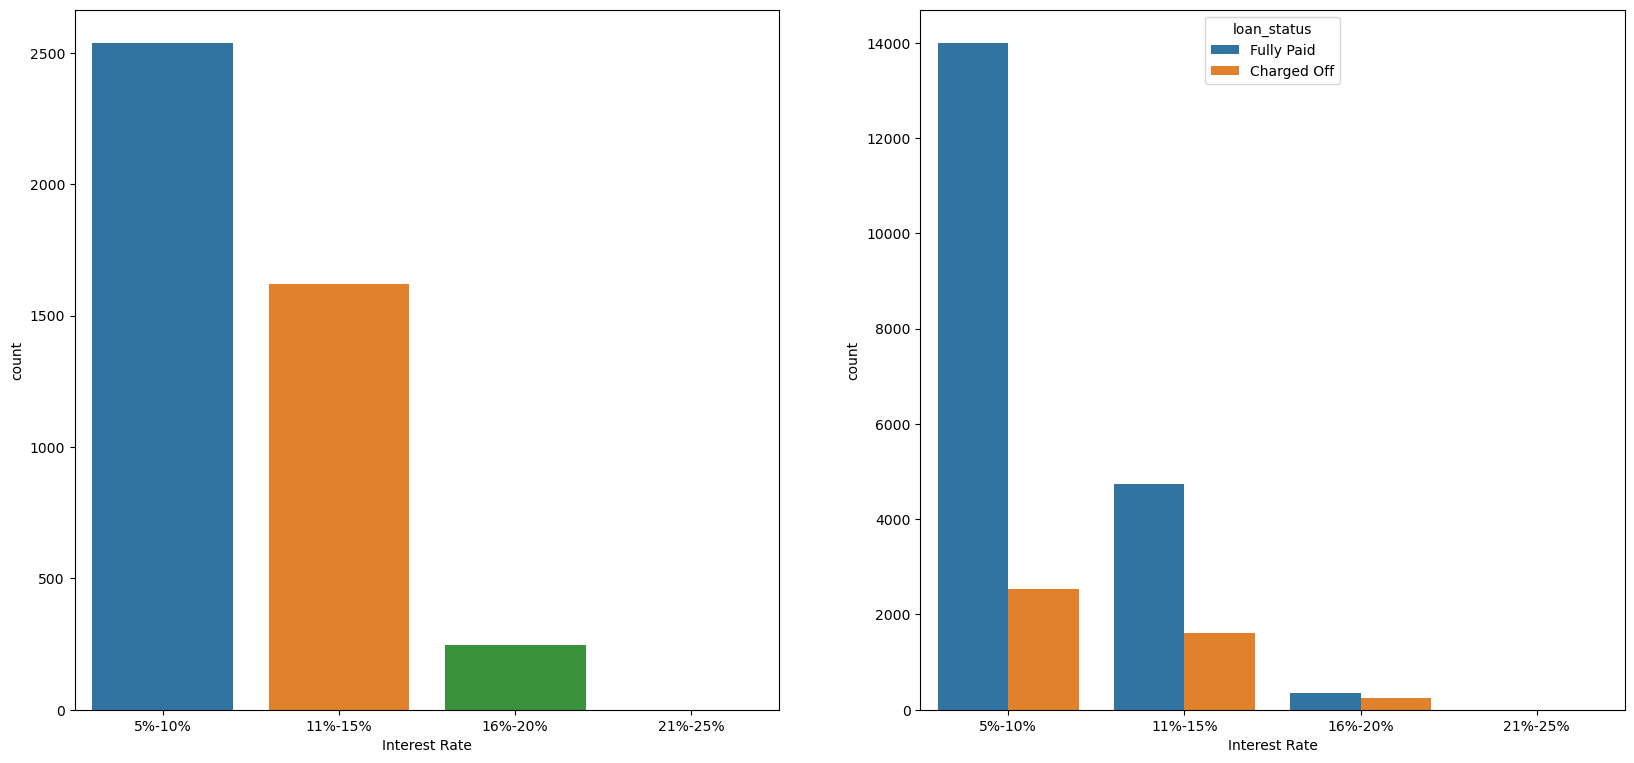

In [25]:
loan_ds['int_rate_grp'] = pd.cut(loan_ds['int_rate'], bins=[10,15,20,25,30],labels=['5%-10%','11%-15%','16%-20%','21%-25%'])
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x='int_rate_grp', data=loan_ds[loan_ds['loan_status'] == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='int_rate_grp', data=loan_ds, hue='loan_status')
plt.xlabel('Interest Rate')

**Observation :** <i>**fully paid** to **defaulters** candidate ratio in right figure shows that the higher the interset rate higher the chance of candidate getting defaulted </i>

<br>

#### Impact of income :
Create categorical variable based on anual income with below range:
* 0k-10k
* 10k-20k
* 20k-30k
* 30k-40k
* 40k-50k
* 50k-60k
* 60k-70k
* 70k-80k'

Text(0.5, 0, 'Annual Income')

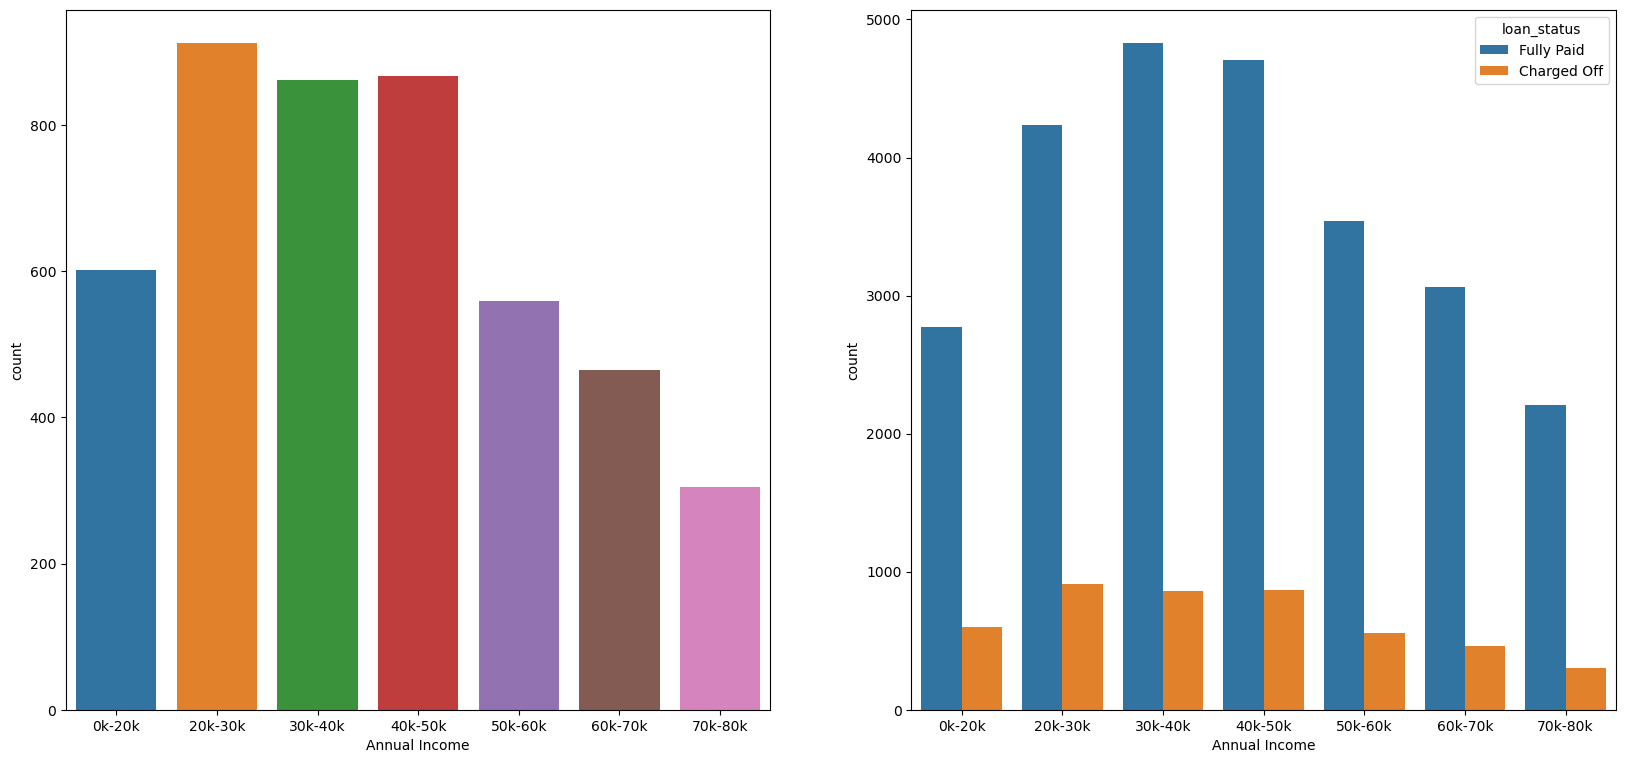

In [26]:
loan_ds['annual_inc_grp'] = pd.cut(loan_ds['annual_inc'], bins=[20000,30000,40000,50000,60000,70000,80000,90000],labels =['0k-20k','20k-30k','30k-40k','40k-50k','50k-60k','60k-70k','70k-80k'])
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.countplot(x='annual_inc_grp', data=loan_ds[loan_ds['loan_status'] == 'Charged Off'])
plt.xlabel('Annual Income')
plt.subplot(222)
sns.countplot(x='annual_inc_grp', data=loan_ds, hue='loan_status')
plt.xlabel('Annual Income')

**Note:** <i>Candidates with less 50000 annual income are more likely to default their loan than higher annual income.</i>

<br>

#### DTI category analysis :

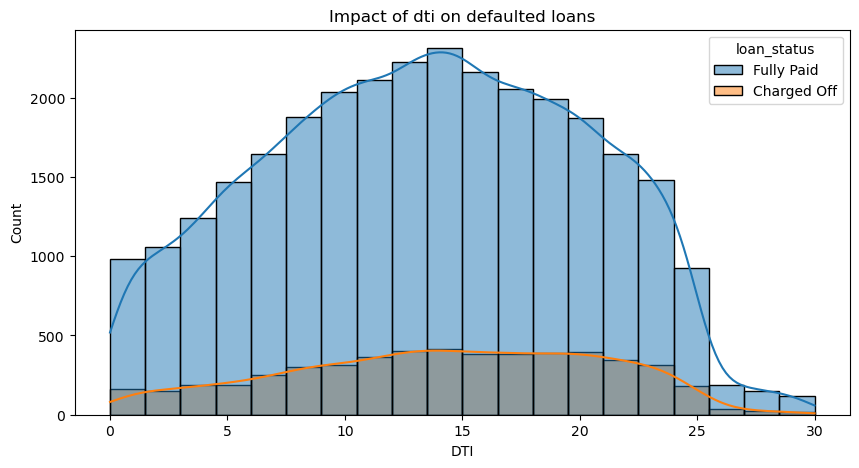

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(data=loan_ds,x='dti',hue='loan_status',bins=20,kde=True)
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('Impact of dti on defaulted loans',fontsize=12)
plt.show()


**Note:** <i>slightly high in the mid (10-15 dti), dosn't give concrete observation that candidate will default if he/she has dti in between 10-15, however we could consider it as side pointer to narrow down our analysis. </i>

<br>

#### Employment Length :

<Axes: xlabel='count', ylabel='emp_length'>

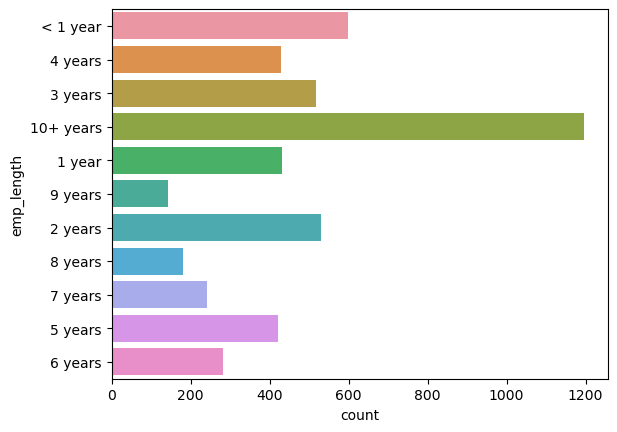

In [28]:
sns.countplot(y='emp_length', data=loan_ds[loan_ds.loan_status == 'Charged Off'])

**Observation:** <i>For the defualted candidate, it is found that most of the candidates are of 10+ employment length. </i>

<br>

**Interest Rate vs Grade Plot :**

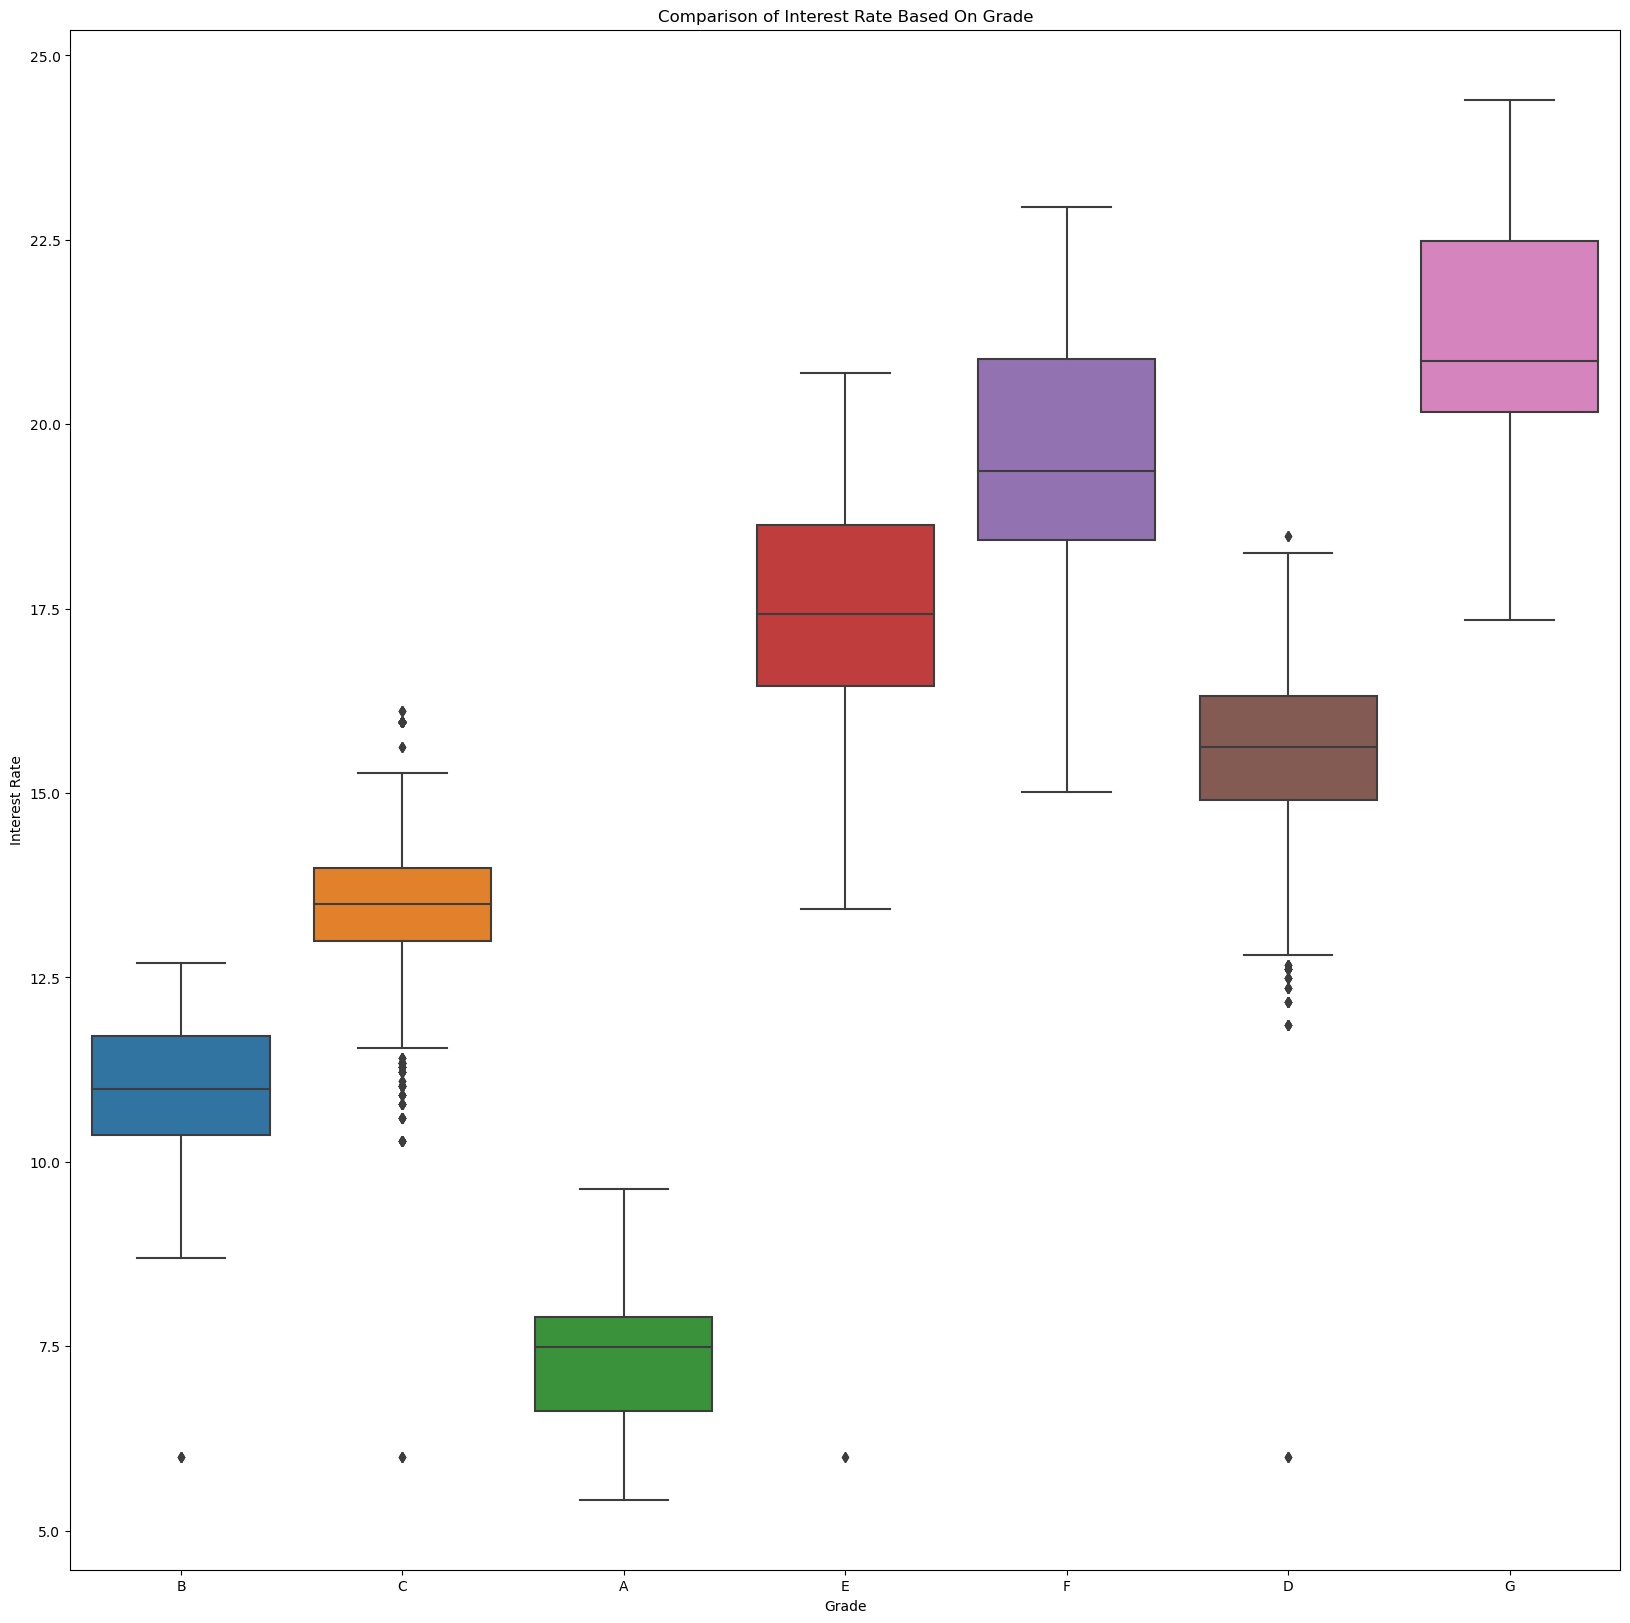

In [29]:
# Comparison of interest rate based on grade
plt.figure(figsize=(20,20))
sns.boxplot(data=loan_ds,y='int_rate',x='grade')
plt.ylabel('Interest Rate')
plt.xlabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

**Observation :** <i>with increasing order of grade, we can observe that, lower the grade (considering G to be the lowest and A to be the highest grade) higher the risk of loan getting defaulted(as interset rates are getting higher and earlier univate analysis already showed higher the interset rate, higher the chance of loan default).</i>

<br>

## Summary :


### Observations
<b>Comparision (36 Months - 60 Months - Fully Paid - Charged Off)</b>
* short term loans (36 mnths) are likely to get defaulted more comapared to 60 months.

<b>Impact of Ownership</b>
* Rented candidates are more likely to default the loan compared to owned and others.

<b>Impact of loan purpose</b>
* A large number of loans are taken for clearing other debts.

<b>Impact of Interest rate</b>
* "fully paid to defaulters" candidate ratio in above figure shows that the higher the interset rate higher the chance of candidate getting defaulted.

<b>Employment Length</b>
* For the defualted candidate, it is found that most of the candidates are of 10+ employment lenght.

<b>Interest Rate vs Grade Plot :</b>
* with increasing order of grade, we can observe that, lower the grade (considering G to be the lowest and A to be the highest grade) higher the risk of loan getting defaulted.

<br>

### Pointers
<b>Impact of income</b>
* Candidates with less 50000 annual income are more likely to default their loan than higher annual income.

<b>DTI category analysis</b>
* slightly high in the mid (10-15 dti), dosn't give concrete observation that candidate will default if he/she has dti in between 10-15, however we could consider it as side pointer to narrow down our analysis.